In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')
print(training)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
print(testing)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [4]:
print("Rows in test.csv: ",testing.shape[0])
print("Rows in train.csv: ",training.shape[0])

Rows in test.csv:  418
Rows in train.csv:  891


In [5]:
print("structure of the test.csv along with the datatypes: ")
print(testing.dtypes)

structure of the test.csv along with the datatypes: 
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
print("structure of the train.csv along with the datatypes: ")
print(training.dtypes)

structure of the train.csv along with the datatypes: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Data Cleaning

In [7]:
training=training.drop("PassengerId",axis=1)
training=training.drop("Name",axis=1)
training=training.drop("Ticket",axis=1)
training=training.drop("Cabin",axis=1)
training.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [8]:
print("Missing Values in train.csv")
training.isnull().sum()

Missing Values in train.csv


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
testing=testing.drop("Name",axis=1)
testing=testing.drop("Ticket",axis=1)
testing=testing.drop("Cabin",axis=1)
testing.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S

In [11]:
print("Missing Values in test.csv")
testing.isnull().sum()

Missing Values in test.csv


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [12]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


Taking care of misssing data

'Age' in Train & Test set

In [13]:
data = [training, testing]

for dataset in data:
    mean = training["Age"].mean()
    std = testing["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = training["Age"].astype(int)
training["Age"].isnull().sum()

0

'Embarked' in Train set

In [14]:
common_value = 'S'
training["Embarked"] = training["Embarked"].fillna(common_value)

'Fare' in Test set

In [15]:
testing = testing.fillna(testing['Fare'].mean())

In [16]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [17]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 24.6+ KB


Identifying  any categorical valued columns (non-numeric) and convert them to numeric.

sex in Train & Test set

In [18]:
le = LabelEncoder()
training["Sex"]= le.fit_transform(training["Sex"])
print(training["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


In [19]:
le = LabelEncoder()
testing["Sex"]= le.fit_transform(testing["Sex"])
print(testing["Sex"])

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32


Embarked in Train & Test set

In [20]:
le = LabelEncoder()
training["Embarked"]= le.fit_transform(training["Embarked"])
print(training["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32


In [21]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 45.4 KB


In [22]:
le = LabelEncoder()
testing["Embarked"]= le.fit_transform(testing["Embarked"])
print(testing["Embarked"])

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32


In [23]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.4 KB


In [24]:
warnings.filterwarnings('ignore')
%matplotlib inline
pp.ProfileReport(training, title = 'Pandas Profiling report of "Train" set', html = {'style':{'full_width': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
pp.ProfileReport(testing, title = 'Pandas Profiling report of "Test" set', html = {'style':{'full_width': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Survival based on the gender

<AxesSubplot:xlabel='Sex'>

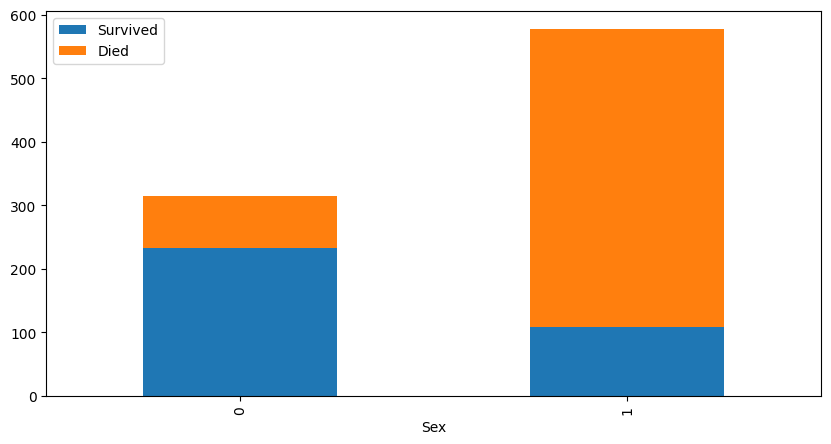

In [26]:
training['Died'] = 1 - training['Survived']
training.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',figsize=(10, 5),stacked=True)

Plotting the same graph but with ratio instead

<AxesSubplot:xlabel='Sex'>

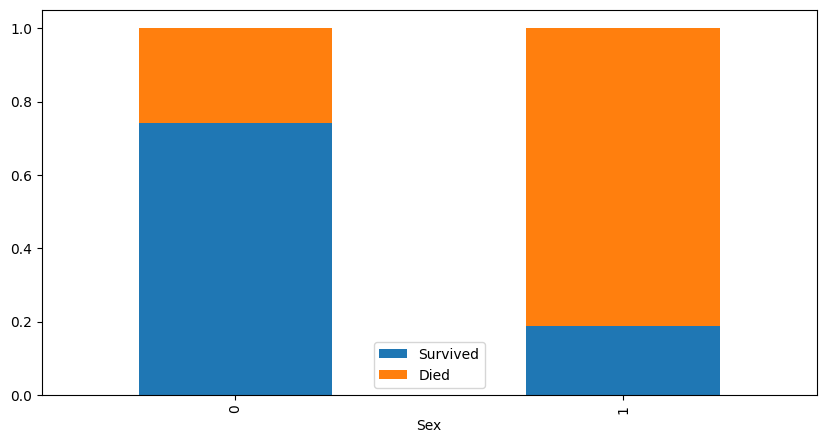

In [27]:
training.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',figsize=(10, 5),stacked=True)

Women are more likely to survive.

Distribution on the count of passengers who died (according to the fare they paid)

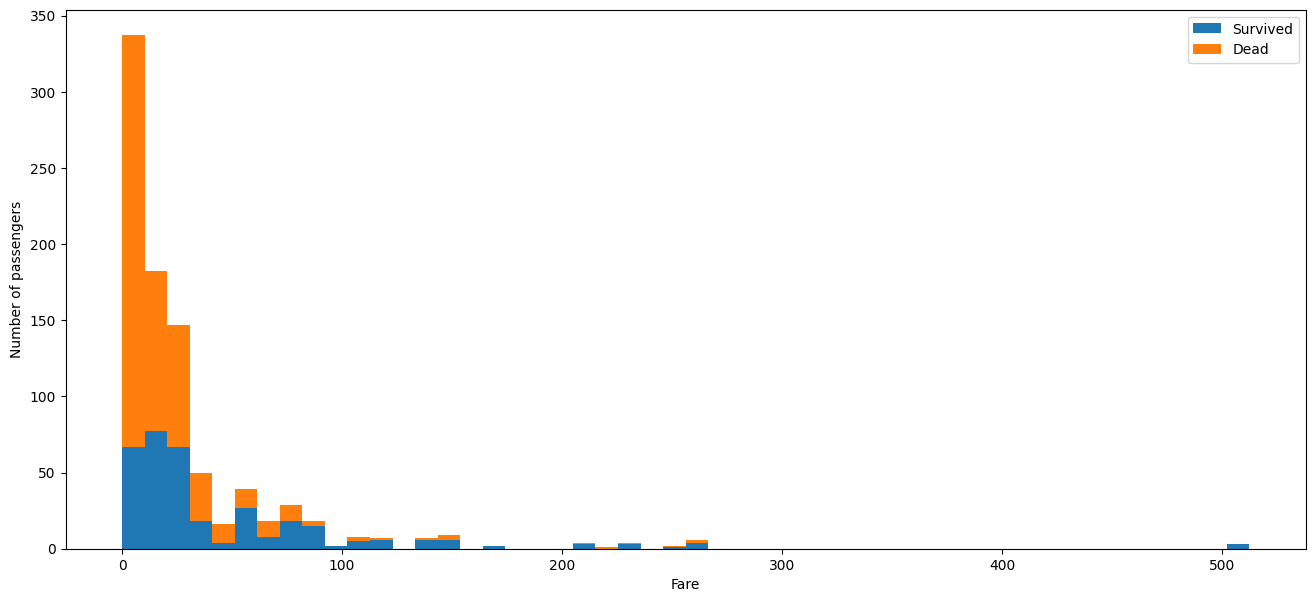

In [28]:
plt.figure(figsize=(16, 7))
plt.hist([training[training['Survived'] == 1]['Fare'], training[training['Survived'] == 0]['Fare']],stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

Relationship between Features and Survival

In [29]:
survived = training[training['Survived'] == 1]
not_survived = training[training['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(training)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(training)*100.0))
print ("Total: %i"%len(training))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


Pclass vs. Survival

Higher class passengers have better survival chance.

In [30]:
training[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

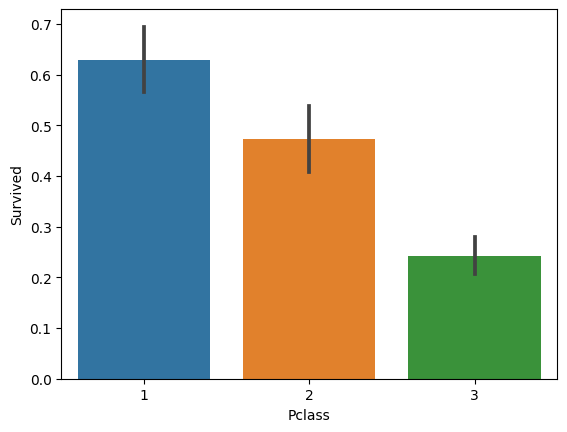

In [31]:
sns.barplot(x='Pclass', y='Survived', data=training)

Sex vs. Survival

In [32]:
training[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

Sex  Survived
0    0  0.742038
1    1  0.188908

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

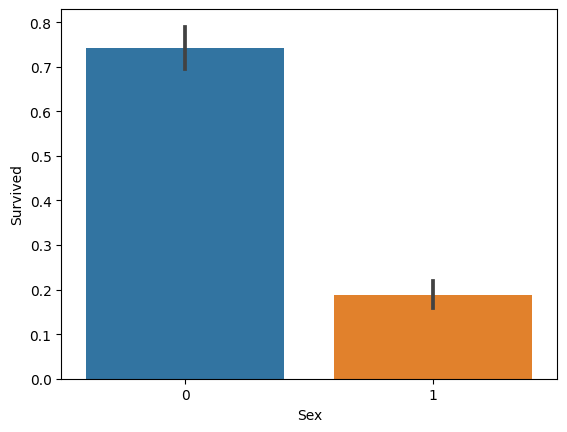

In [33]:
sns.barplot(x='Sex', y='Survived', data=training)

Pclass & Sex vs. Survival

Sex       0    1
Pclass          
1        94  122
2        76  108
3       144  347


Text(0, 0.5, 'Percentage')

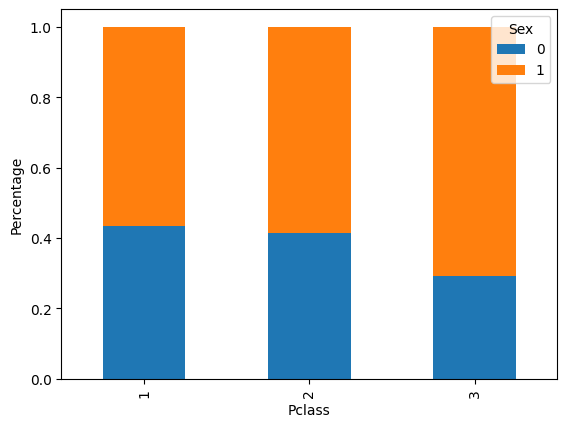

In [34]:
tab = pd.crosstab(training['Pclass'], training['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

Pclass, Sex & Embarked vs. Survival

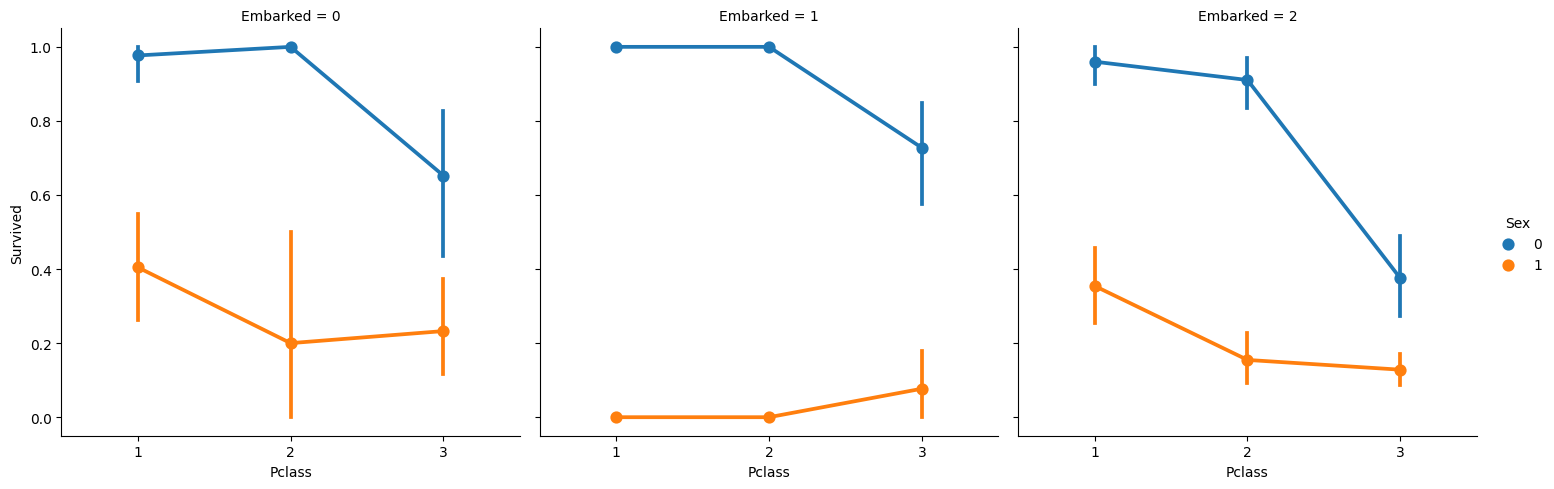

In [35]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=training)

Embarked vs. Survived

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

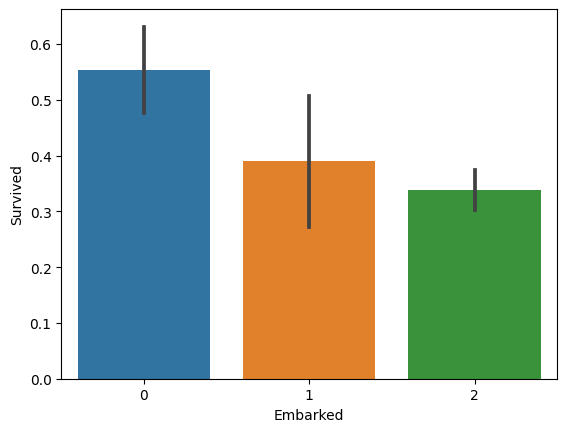

In [36]:
training[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=training)

Age vs. Survival

<AxesSubplot:xlabel='Sex', ylabel='Age'>

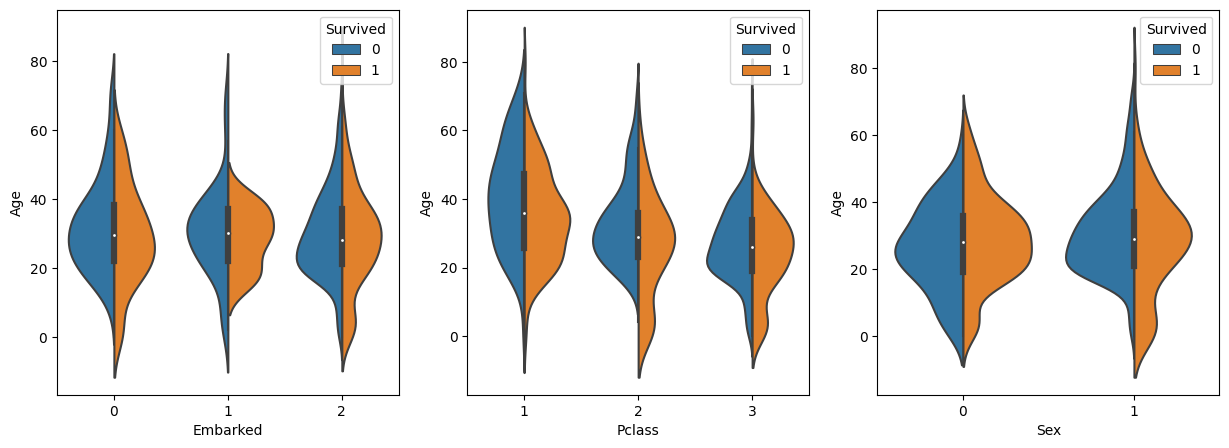

In [37]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=training, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=training, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=training, split=True, ax=ax3)

Correlating Features

<AxesSubplot:>

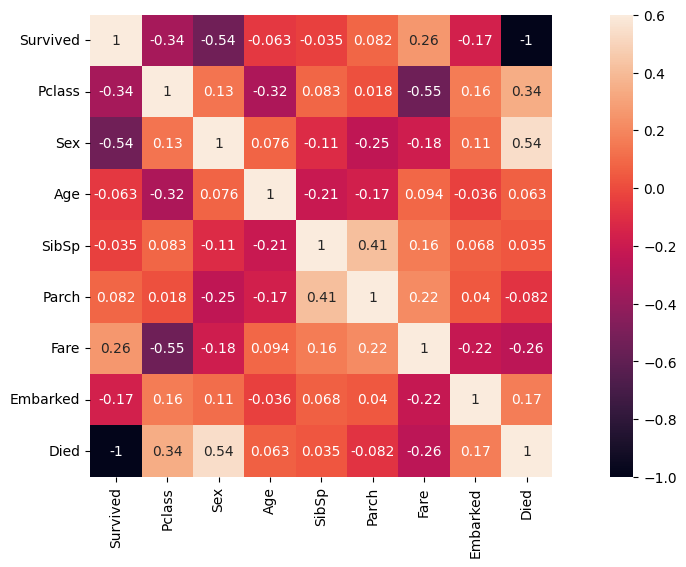

In [38]:
plt.figure(figsize=(15,6))
sns.heatmap(training.corr(), vmax=0.6, square=True, annot=True)